In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt

header = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"}
res = requests.get(url="http://news.naver.com/main/ranking/popularDay.naver", headers=header)
soup = BeautifulSoup(res.text)

In [54]:
allBox = soup.find_all("div", attrs={"class":"rankingnews_box"})
len(allBox)

82

In [55]:
allData = []
for box in allBox:
    compName = box.strong.text
    allRank = box.find_all("li")
    for rank in allRank:
        if rank.a==None:
            continue
        data = []
        data.append(compName)
        data.append(rank.a.text)
        data.append(rank.a["href"])
        allData.append(data)
df = pd.DataFrame(allData, columns=["company", "title", "link"])
df.to_csv("NaverNews.csv", index=False)

In [56]:
df = pd.read_csv("NaverNews.csv")
df

,company,title,link
0,코리아헤럴드,Korea unveils measures to cut reliance on priv...,https://n.news.naver.com/article/044/000024754...
1,코리아헤럴드,Woman convicted for 'hacking' into boyfriend’s...,https://n.news.naver.com/article/044/000024751...
2,코리아헤럴드,[Graphic News] New York tops world’s most expe...,https://n.news.naver.com/article/044/000024755...
3,코리아헤럴드,Monk decides to return to lay life amid suspic...,https://n.news.naver.com/article/044/000024751...
4,코리아헤럴드,Choo remains wary of China's reopening,https://n.news.naver.com/article/044/000024752...
...,...,...,...
400,레이디경향,"심장 건강에 특히 좋은 견과류, 이것",https://n.news.naver.com/article/145/000001904...
401,레이디경향,"쿰쿰한 장마철 욕실, 전문가의 청소법은요",https://n.news.naver.com/article/145/000001904...
402,레이디경향,젤 네일 말리는 ‘UV 램프’ DNA 손상시킨다,https://n.news.naver.com/article/145/000001905...
403,레이디경향,이제 사무실에서도 블루보틀…분말 형태 인스턴트 커피 출시,https://n.news.naver.com/article/145/000001904...


In [30]:
df["title"] = df["title"].str.replace("[^가-힣]", " ", regex=True)
df

,company,title,link
0,YTN,거제 거북선의 최후 목재는 소각하고 금속은 고물상에,https://n.news.naver.com/article/052/000190220...
1,YTN,과태료 번 낼 수도 인도 주차 반복 신고 가능 앵커리포트,https://n.news.naver.com/article/052/000190221...
2,YTN,양육비 내놔 아이 아빠 얼굴 공개 인 시위 미혼모 유죄,https://n.news.naver.com/article/052/000190217...
3,YTN,날씨 내륙 장마 소강 무더위 기승 제주도 남해안 장맛비,https://n.news.naver.com/article/052/000190223...
4,YTN,프리고진 정권 전복 불원 푸틴 반란은 실패할 운명,https://n.news.naver.com/article/052/000190222...
...,...,...,...
400,레이디경향,심장 건강에 특히 좋은 견과류 이것,https://n.news.naver.com/article/145/000001904...
401,레이디경향,쿰쿰한 장마철 욕실 전문가의 청소법은요,https://n.news.naver.com/article/145/000001904...
402,레이디경향,젤 네일 말리는 램프 손상시킨다,https://n.news.naver.com/article/145/000001905...
403,레이디경향,이제 사무실에서도 블루보틀 분말 형태 인스턴트 커피 출시,https://n.news.naver.com/article/145/000001904...


In [57]:
kiwi = Kiwi()
df["result"] = df["title"].apply(lambda x : kiwi.tokenize(x))
df_word = df["result"].explode().reset_index(drop=True)
df_word

0           (Korea, SL, 0, 5)
1         (unveils, SL, 6, 7)
2       (measures, SL, 14, 8)
3             (to, SL, 23, 2)
4            (cut, SL, 26, 3)
                ...          
7044          (하, XSA, 18, 1)
7045           (게, EC, 19, 1)
7046          ([, SSO, 20, 1)
7047         (화보, NNG, 21, 2)
7048          (], SSC, 23, 1)
Name: result, Length: 7049, dtype: object

In [58]:
word = []
target = ["NNG", "NNP", "VV", "VA", "XR", "SL"]
for token in df_word:
    if type(token) == float:
        continue
    if token[1] in target:
        word.append(token[0])
word

['Korea',
 'unveils',
 'measures',
 'to',
 'cut',
 'reliance',
 'on',
 'private',
 'education',
 'Woman',
 'convicted',
 'for',
 'hacking',
 'into',
 'boyfriend',
 's',
 'phone',
 'Graphic',
 'News',
 'New',
 'York',
 'tops',
 'world',
 's',
 'most',
 'expensive',
 'cities',
 'for',
 'expats',
 'Monk',
 'decides',
 'to',
 'return',
 'to',
 'lay',
 'life',
 'amid',
 'suspicions',
 'he',
 'has',
 'kids',
 'Choo',
 'remains',
 'wary',
 'of',
 'China',
 's',
 'reopening',
 '식사',
 '시간',
 '주석',
 '교수',
 '아들',
 '울리',
 '라면',
 '스프',
 '가슴',
 '낳',
 '지갑',
 '키우',
 '한국',
 '댕냥',
 '육아',
 '삼매경',
 '새우',
 '먹이',
 '주',
 '가',
 '양식장',
 '직원',
 '사육',
 '수조',
 '숨지',
 '발견',
 '황의조',
 '여친',
 '영상',
 '지우',
 '동의',
 '찍',
 '처벌',
 '대상',
 '허술',
 'N',
 '방',
 '방지법',
 'SNS',
 '황의조',
 '영상',
 '팔',
 '훈련',
 '하',
 '유도',
 '후',
 '뇌출혈',
 '되',
 '초',
 '아들',
 '속보',
 '축구',
 '국가',
 '대표',
 '황의조',
 'SNS',
 '사생활',
 '폭로',
 '글',
 '작성자',
 '고소',
 '추미애',
 '조국',
 '출마',
 '비난',
 '인간',
 '조국',
 '탓',
 '생후',
 '되',
 '아기',
 '좀비',
 '마약',
 '먹',
 '사망',
 '일',

In [59]:
df_word = pd.DataFrame({"word":word})
df_word["count"] = df_word["word"].str.len()
df_word = df_word.query("count >= 2")
df_word

,word,count
0,Korea,5
1,unveils,7
2,measures,8
3,to,2
4,cut,3
...,...,...
3218,장인,2
3219,정해인,3
3220,이번,2
3221,강렬,2


In [60]:
df_word_sort = df_word.groupby("word", as_index=False).count().sort_values("count", ascending=False)
df_word_sort

,word,count
1234,정부,16
1236,정유정,14
749,새우깡,13
865,신라면,13
1125,인하,13
...,...,...
641,봉합,1
640,본인,1
639,본사,1
637,복판,1


In [61]:
df_word_sort = df_word_sort.query("count >= 2")
df_word_sort

,word,count
1234,정부,16
1236,정유정,14
749,새우깡,13
865,신라면,13
1125,인하,13
...,...,...
296,김영철,2
341,냉방,2
873,실적,2
1023,운동,2


In [63]:
dic_word = df_word_sort.set_index("word")
dic_word = dic_word.to_dict()
dic_word

{'count': {'정부': 16,
  '정유정': 14,
  '새우깡': 13,
  '신라면': 13,
  '인하': 13,
  '황의조': 11,
  '농심': 11,
  '한국': 11,
  '간첩': 11,
  '경찰': 10,
  '조국': 9,
  '가격': 9,
  '추미애': 9,
  '여성': 9,
  '아들': 9,
  '살인': 9,
  '피해자': 8,
  '대통령': 8,
  '유도': 8,
  '단독': 8,
  '오염수': 8,
  '속보': 8,
  '광고': 8,
  '반란': 8,
  '숨지': 7,
  '화이트': 7,
  '우크라': 7,
  '리스트': 7,
  '바그너': 7,
  '전화': 7,
  '뇌출혈': 7,
  '사진': 7,
  '찌르': 7,
  '예고': 7,
  '가능': 7,
  '일본': 6,
  '빌딩': 6,
  '인사': 6,
  '해커스': 6,
  'vs': 6,
  '주차': 6,
  '출마': 6,
  '남편': 6,
  '규제': 6,
  '수출': 6,
  '거짓': 6,
  '수학': 6,
  '관장': 6,
  '푸틴': 6,
  '주차장': 6,
  '신고': 6,
  '에이스침대': 6,
  '복원': 6,
  '민주당': 6,
  '제주': 6,
  '비행기': 5,
  '출시': 5,
  '해제': 5,
  '인간': 5,
  '이재명': 5,
  '박원순': 5,
  '아이': 5,
  '합격': 5,
  '아빠': 5,
  '회장': 5,
  '나이': 5,
  '장애': 5,
  '나오': 5,
  '침대': 5,
  '국민': 5,
  '스티커': 5,
  '흉기': 5,
  '관광객': 5,
  '프리': 5,
  '공무원': 5,
  '별세': 5,
  '위하': 5,
  '창문': 5,
  '전세': 5,
  '차익': 5,
  '협박': 5,
  '사생활': 5,
  '얼굴': 5,
  '장맛비': 5,
  '사기': 5,
  '완전': 4,
  '하루': 

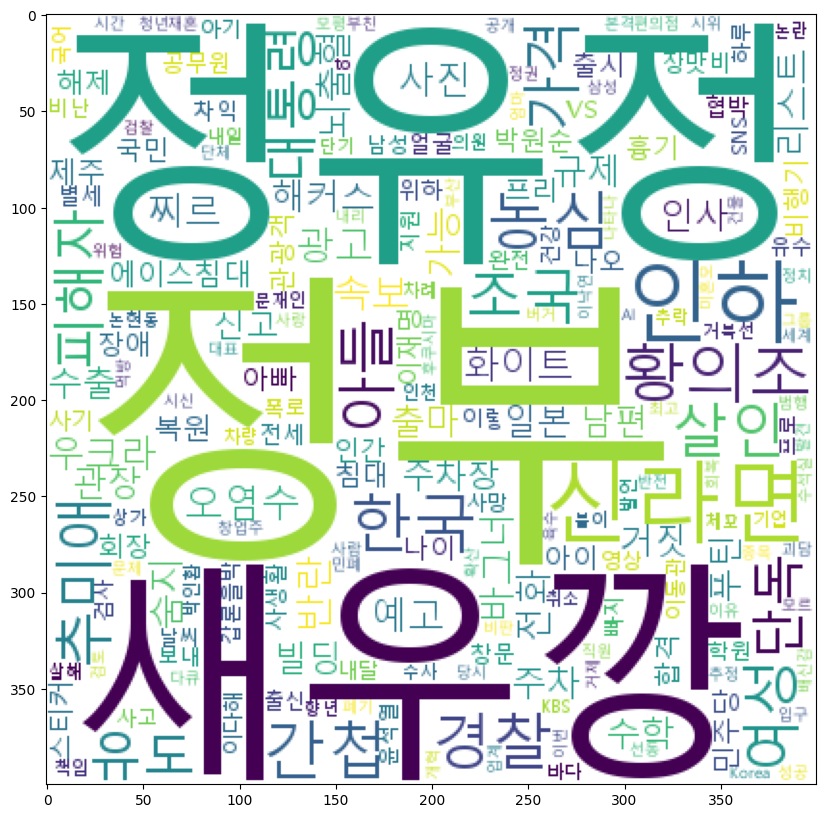

In [77]:
wc = WordCloud(font_path="malgun", random_state=123, width=400, height=400, background_color="white")
wcImg = wc.generate_from_frequencies(dic_word["count"])
plt.figure(figsize=(10,10))
plt.imshow(wcImg)